In [1]:
# project: p8
# submitter-netid: cjohnstone
# partner-netid: mwodnicki
import csv
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    return exampleData

In [2]:
#q1
def get_mapping(path):
    dic={}
    list1=process_csv(path)
    list2=dict(list1)
    return list2
get_mapping("small_mapping.csv")

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [3]:
#q2
dic=get_mapping("small_mapping.csv")
dic["tt0313542"]

'Runaway Jury'

In [4]:
#q3
dic=get_mapping("small_mapping.csv")
list1=[]
for key in dic:
    if key[:2]=="tt":
        list1.append(dic[key])
list1

['Runaway Jury', 'Lethal Weapon']

In [5]:
#q4
dic=get_mapping("small_mapping.csv")
list1=[]
str1=""
for key in dic:
    val=dic[key][:4]
    if val=="Gary":
        list1.append(key)
list1

['nm0000997', 'nm0001219']

In [6]:
#q5
def get_raw_movies(path):
    list3=[]
    list2=[]
    genre=[]
    num=0
    list1=process_csv(path)[1:]
    for i in list1:
        for j in i:
            if j.find(",")!=-1 or j.find("nm")!=-1:
                words=j.split(",")
                list3.append(words)
            elif num==5:
                genre.append(j)
                list3.append(genre)
            else:
                list3.append(j)
            num+=1
        dic={"title":list3[0],"year":int(list3[1]),"rating":float(list3[2]),"directors":list3[3],"actors":list3[4],"genres":list3[5]}
        list2.append(dic) 
        list3=[]
        genre=[]
        num=0
    return list2
get_raw_movies("small_movies.csv")

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [7]:
#q6
num=0
list1=get_raw_movies("small_movies.csv")
dic=list1[0]
for i in dic:
    if i =="genres":
        list2=dic[i]
        break
num=len(list2)
        
num

3

In [8]:
#q7
list1=get_raw_movies("small_movies.csv")
dic=list1[1]
for i in dic:
    if i =="actors":
        list2=dic[i]
        break
list2[3]

'nm0752751'

In [9]:
#q8
def get_movies(movies_path, mapping_path):
    list1=get_raw_movies(movies_path)
    list2=get_mapping(mapping_path)
    for i in list1:
        for j in i:
            if j=="title":
                for l in list2:
                    if i[j]==l:
                        i[j]=list2[l]
                        break
            if j=="actors" or j=="directors":
                for b in i[j]:
                    for l in list2:
                        if b==l:
                            num=i[j].index(b)
                            i[j][num]=list2[l]
                            break
    return list1
small=get_movies("small_movies.csv", "small_mapping.csv")
small[0]["title"]

'Runaway Jury'

In [10]:
#q9
small[1]["directors"]

['Richard Donner']

In [11]:
#q10
small[-1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [12]:
#q11
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [13]:
#q12
movies = get_movies("movies.csv", "mapping.csv")
movies[:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [14]:
#q13
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [15]:
#q14
import copy
li1=copy.deepcopy(movies)
li2=copy.deepcopy(movies)
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies
dic=filter_movies_by_year(movies, 1930)
yers=copy.deepcopy(dic)
dic

[{'title': 'Hook Line and Sinker',
  'year': 1930,
  'rating': 6.4,
  'directors': ['Edward F. Cline'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Ralf Harolde'],
  'genres': ['Comedy', 'Romance']},
 {'title': 'The Big Trail',
  'year': 1930,
  'rating': 7.2,
  'directors': ['Raoul Walsh', 'Louis R. Loeffler'],
  'actors': ['John Wayne', 'El Brendel', 'Tully Marshall'],
  'genres': ['Adventure', 'Romance', 'Western']}]

In [16]:
#q15
i = 0
while i < len(li1):
    if li1[i]["year"] != 1931:
        li1.remove(li1[i])
    else:
        i += 1
dic=filter_movies_by_year(li1, 1931)
dic

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [17]:
#q16
def find_data(data, li):
    list1=[]
    i=0
    while i < len(li):
        num=0
        if list1==[]:
            list1.append(li[i][data][0])  
        else:
            for k in li[i][data]:
                for j in list1:
                    if j==k:
                        num=1
                        break
                if num==0:
                    list1.append(k)
                num=0
        i += 1
    return list1
l1=find_data("genres", li2)  
len(l1)

18

In [18]:
#q17
l1=find_data("actors", li2)
len(l1)

2605

In [19]:
#q18
l1=find_data("directors", li2)
len(l1)

1247

In [20]:
#q19
i = 0
num=0
t=0
while i < len(li2):
    num=num+li2[i]["rating"]
    t+=1
    i+=1
ave=num/t
ave

6.401659528907912

In [21]:
#q20
i = 0
t=""
while i < len(li2):
    if len(li2[i]["title"]) > len(t):
        t=li2[i]["title"]
    i += 1
t

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [22]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [23]:
#q21
def bucketize(movie_list, movie_key):
    dic={}
    list1=[]
    list2=[]
    num=0
    for i in movie_list:
        for j in i:
            if j==movie_key:
                if len(list2)<1:
                    if isinstance(i[j], list):
                        list2.append(i[j][0])
                        for t in i[j]:
                            for k in list2:
                                if t==k:
                                    num=1
                            if num<1:
                                list2.append(t)
                            num=0   
                    else:   
                        list2.append(i[j])
                else:
                    if isinstance(i[j], list):
                        for p in i[j]:
                            for k in list2:
                                if p==k:
                                    num=1
                            if num<1:
                                list2.append(p)
                            num=0
                    else:
                        for k in list2:
                            if k==i[j]:
                                num=1
                        if num<1:
                            list2.append(i[j])
                        num=0
    for k in list2:
        for i in movie_list:
            for j in i:
                if j==movie_key:
                    if isinstance(i[j], list):
                        for p in i[j]:
                            if p==k:
                                list1.append(i)
                                break
                    elif i[j]==k:
                        list1.append(i)           
        dic.update({k:list1})
        list1=[]
    return dic
bucketize(test_movies, "year")         

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [24]:
#q22
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [25]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [26]:
#q24
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [27]:
#q25
len(bucketize(small, "actors"))

7

In [28]:
#q26
movies=li2
gen=bucketize(movies, "genres")
dic=gen
len(gen)

18

In [29]:
#q27
dic1={}
for i in dic:
    dic1.update({i:len(dic[i])})
dic1

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [30]:
%matplotlib inline

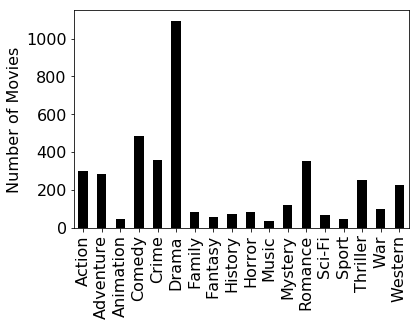

In [31]:
#q28
import matplotlib, pandas

def plot_dict(d, label="Number of Movies"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)
plot_dict(dic1)

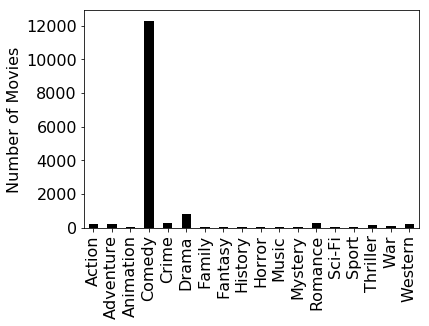

In [32]:
#q29
dic1={}
for i in dic:
    for j in dic[i]:
        for k in j:
            if k =="year":
                if int(j[k]) <2000:
                    num+=1
    dic1.update({i:num})
    num=0
plot_dict(dic1)           

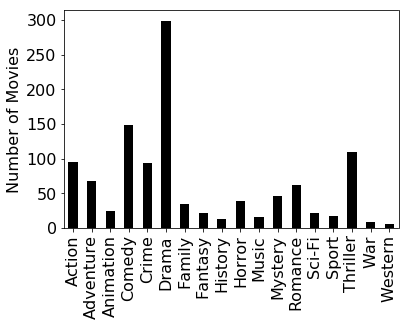

In [33]:
#q30
dic1={}
for i in dic:
    for j in dic[i]:
        for k in j:
            if k =="year":
                if int(j[k]) >=2000:
                    num+=1
    dic1.update({i:num})
    num=0
plot_dict(dic1)

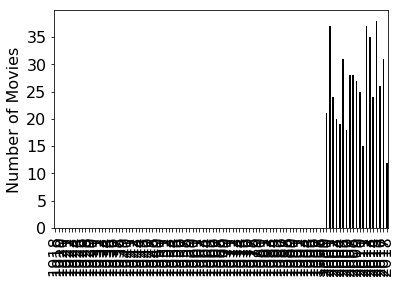

In [34]:
#q31
dic=bucketize(movies, "year")
dic1={}
for i in dic:
    for j in dic[i]:
        for k in j:
            if k =="year":
                if int(j[k]) >=2000:
                    num+=1
    dic1.update({i:num})
    num=0
plot_dict(dic1)

In [35]:
#q32
def span(dic, years):
    dic2={}
    for i in dic:
        maxnum=0
        minnum=3000
        for j in dic[i]:
            for k in j:
                if k=="year":
                    if maxnum==0:
                        maxnum=int(j[k])
                        minnum=int(j[k])
                    else:
                        if int(j[k])>maxnum:
                            maxnum=int(j[k])
                        elif int(j[k])<minnum:
                            minnum=int(j[k])
        spn=maxnum-minnum
        if spn>=years:
            dic2.update({i:spn})
    return dic2
dire=bucketize(movies, "directors")
span(dire, 30)   

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [36]:
#q33
act=bucketize(movies, "actors")
span(act, 40)

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Dennis Quaid': 40,
 'Marlon Brando': 49,
 'Armand Assante': 40,
 'Eddie Albert': 41,
 'Jon Voight': 44,
 'Tony Curtis': 45,
 'Michael Constantine': 42,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Fredric March': 41,
 'Lloyd Bridges': 44,
 'Robert Redford': 44,
 'Dean Stockwell': 53}

In [37]:
#q34
def row_ranking(row):
    return row["span"]

def top_n_span(buckets, n):
    spans = span(buckets, 0)
    rows = []
    for name in spans:
        spn = spans[name]
        rows.append({"name": name, "span": spn})
    rows.sort(key=row_ranking, reverse=True)
    rows=rows[:n]
    return rows
top_n_span(dire, 10)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [38]:
#q35
top_n_span(act, 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [39]:
#q36
def rank(dic):
    dic2={}
    list1=[]
    list2=[]
    for i in dic:
        num=0
        count=0
        for j in dic[i]:
            for k in j:
                if k=="rating":
                    count+=1
                    list2.append(float(j[k]))
                    break
        list2=sorted(list2)
        middle = float(len(list2))/2
        if len(list2) % 2 != 0:
            num= list2[int(middle-.5)]
        else:
            num1=list2[int(middle)]
            num2=list2[int(middle-1)]
            rem=num1-num2
            num=num2+(rem/2)
        list1.append(num)
        list1.append(count)
        dic2.update({i:list1})
        list1=[]
        list2=[]
    return dic2
def row_ranking1(row):
    return row["rating"]
def top_n_span1(buckets, n, num):
    spans = rank(buckets)
    rows = []
    for name in spans:
        spn = spans[name][0]
        cnt= spans[name][1]
        if int(cnt)>=num:
            rows.append({"category": name, "rating": spn, "count": cnt})
    rows.sort(key=row_ranking1, reverse=True)
    rows=rows[:n]
    return rows
top_n_span1(gen,3,0)

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [40]:
#q37
yer=bucketize(movies, "year")
top_n_span1(yer,10,0)

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [41]:
#q38
top_n_span1(yer,5,10)

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [42]:
#q39
top_n_span1(dire,6,3)

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'category': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'category': 'Andrew Grieve', 'rating': 8.2, 'count': 6}]

In [43]:
#q40
top_n_span1(act,3,5)

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]